Date: 13th February, 2022
Author: Rama Surekha Katreddy
Task: Implementing custom and Transfer learning on multi class image classification  

In [ ]:
# import keras for modelling
import tensorflow.keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, save_model, load_model 

# os, shutil for file operations
import os, shutil
import matplotlib
import matplotlib.pyplot as plt

# import argparse for accepting
import argparse

# set seed
import numpy as np
np.random.seed(42)

## Build a folder structure and segregate the images
   train, test and validation images

In [21]:
# directory for original data source
# 3,000 images of 1,000 each: (cats, dogs, panda)
#source:
original_dataset_dir = os.path.join(os.getcwd() , "zoo_classifier")
print(original_dataset_dir)

#target:
target_dir = os.path.join(os.getcwd() , "zoo_classifier(gen)")
os.mkdir(target_dir)
print(target_dir)

/content/drive/MyDrive/ColabNotebooks/ImageClassification/zoo_classifier
/content/zoo_classifier(gen)


In [22]:
###train####
train_dir = os.path.join(target_dir, 'train')
os.mkdir(train_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_panda_dir = os.path.join(train_dir, 'panda')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(train_panda_dir)

###validation####
validation_dir = os.path.join(target_dir, 'validation')
os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_panda_dir = os.path.join(validation_dir, 'panda')
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(validation_panda_dir)

###test####
test_dir = os.path.join(target_dir, 'test')
os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_panda_dir = os.path.join(test_dir, 'panda')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(test_panda_dir)

In [23]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(train_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total training pandas images:', len(os.listdir(train_panda_dir)))
print('total validation pandas images:', len(os.listdir(validation_panda_dir)))
print('total test pandas images:', len(os.listdir(validation_panda_dir)))

total training cat images: 0
total validation cat images: 0
total test cat images: 0
total training dog images: 0
total validation dog images: 0
total test dog images: 0
total training pandas images: 0
total validation pandas images: 0
total test pandas images: 0


In [ ]:
# for my process, I have chosen:
# training   70%
# validation 15%
# testing    15%

# my source files all have the format (cats, dogs, panda)_ and then a 5-digit number
# this number is padded up front with leading zeros
# it also begins with 1, not 0
# 'cats_{:05d}.jpg'.format(i) for i in range(1... , ...1001)]

In [24]:
# Cats
# Copy 700 cats to train_cats_dir
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(1,701)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "cats", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 cats to validation_cats_dir
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(701,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "cats",fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 cats to test_cats_dir
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(851,1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,"cats", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Verify the 700 150 150 split was successful
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total test cats images:', len(os.listdir(test_cats_dir)))


total training cats images: 700
total validation cats images: 150
total test cats images: 150


In [ ]:
# Dogs
# Copy 700 dogs to train_dogs_dir
fnames = ['dogs_{:05d}.jpg'.format(i) for i in range(1,701)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 dogs to validation_dogs_dir
fnames = ['dogs_{:05d}.jpg'.format(i) for i in range(701,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 dogs to test_dogs_dir
fnames = ['dogs_{:05d}.jpg'.format(i) for i in range(851,1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Verify the 700 150 150 split was successful
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training dogs images: 700
total validation dogs images: 150
total test dogs images: 150


In [ ]:
# panda
# Copy 700 panda to train_panda_dir
fnames = ['panda_{:05d}.jpg'.format(i) for i in range(1,701)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "panda", fname)
    dst = os.path.join(train_panda_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 panda to validation_panda_dir
fnames = ['panda_{:05d}.jpg'.format(i) for i in range(701,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "panda", fname)
    dst = os.path.join(validation_panda_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 150 panda to test_panda_dir
fnames = ['panda_{:05d}.jpg'.format(i) for i in range(851,1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "panda", fname)
    dst = os.path.join(test_panda_dir, fname)
    shutil.copyfile(src, dst)

# Verify the 700 150 150 split was successful
print('total training panda images:', len(os.listdir(train_panda_dir)))
print('total validation panda images:', len(os.listdir(validation_panda_dir)))
print('total test panda images:', len(os.listdir(test_panda_dir)))

total training panda images: 700
total validation panda images: 150
total test panda images: 150


## Building CNN network
CNN network comprises of alternate Conv2D and MaxPooling2D layers
The number of inputs and outputs depends on our database while the number of layers in between are configurable.
Activation function : softmax as we are solving the multi class classification problem.
1. stack of alternated Conv2D (with relu activation) and MaxPooling2D layers
2. Flatten layer
3. Dense layer (with relu activation)
4. Dropout layer to reduce overfitting
5. Dense layer (with softmax activation)
6. Output layer with 3 nodes because we have 3 categories

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

# building our convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

2022-04-18 17:55:42.514799: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 17:55:42.516654: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# use adam optimizer to compile
# with categorical crossentropy as our loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# view a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Data Augumentation

We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: data augmentation.

In [ ]:
# train the network using data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# test datagen resizes only
test_datagen = ImageDataGenerator(rescale=1./255)

# use flow_from_directory
# train and validation generators with batch size 50, class mode categorical
# keep resize at 150x150 and add shuffle
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [ ]:
# run fit generator with 10 epochs
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
42/42 [==============================] - 172s 4s/step - loss: 0.9800 - accuracy: 0.4824 - val_loss: 0.9991 - val_accuracy: 0.5400
Epoch 2/20
42/42 [==============================] - 171s 4s/step - loss: 0.8320 - accuracy: 0.5614 - val_loss: 0.7602 - val_accuracy: 0.6156
Epoch 3/20
42/42 [==============================] - 166s 4s/step - loss: 0.8049 - accuracy: 0.5876 - val_loss: 0.7712 - val_accuracy: 0.6089
Epoch 4/20
42/42 [==============================] - 164s 4s/step - loss: 0.8037 - accuracy: 0.6024 - val_loss: 0.8958 - val_accuracy: 0.5600
Epoch 5/20
42/42 [==============================] - 183s 4s/step - loss: 0.7662 - accuracy: 0.6110 - val_loss: 0.6774 - val_accuracy: 0.6578
Epoch 6/20
42/42 [==============================] - 176s 4s/step - loss: 0.7325 - accuracy: 0.6410 - val_loss: 0.6507 - val_accuracy: 0.6489
Epoch 7/20
42/42 [==============================] - 152s 4s/step - loss: 0.7036 - accuracy: 0.6500 - val_loss: 0.5883 - val_accuracy: 0.6778
Epoch 8/20
42

In [ ]:
# save the model
model.save('cats_dogs_panda.h5')

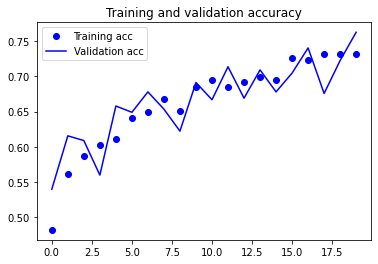

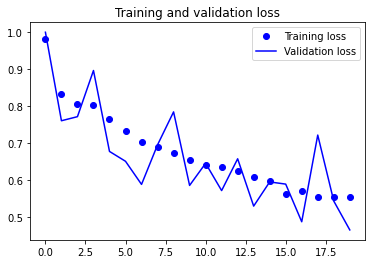

In [ ]:
# plot model accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Without augumentation

In [ ]:
# train the network using data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
# test datagen resizes only
test_datagen = ImageDataGenerator(rescale=1./255)

# use flow_from_directory
# train and validation generators with batch size 50, class mode categorical
# keep resize at 150x150 and add shuffle
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [ ]:
# run fit generator with 10 epochs
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
42/42 [==============================] - 155s 4s/step - loss: 0.4837 - accuracy: 0.7767 - val_loss: 0.4705 - val_accuracy: 0.7533
Epoch 2/20
42/42 [==============================] - 156s 4s/step - loss: 0.4182 - accuracy: 0.8067 - val_loss: 0.4567 - val_accuracy: 0.7733
Epoch 3/20
42/42 [==============================] - 158s 4s/step - loss: 0.3640 - accuracy: 0.8324 - val_loss: 0.4521 - val_accuracy: 0.7822
Epoch 4/20
42/42 [==============================] - 155s 4s/step - loss: 0.3029 - accuracy: 0.8790 - val_loss: 0.4426 - val_accuracy: 0.7956
Epoch 5/20
42/42 [==============================] - 159s 4s/step - loss: 0.2533 - accuracy: 0.8938 - val_loss: 0.4928 - val_accuracy: 0.7711
Epoch 6/20
42/42 [==============================] - 155s 4s/step - loss: 0.1935 - accuracy: 0.9219 - val_loss: 0.6416 - val_accuracy: 0.7578
Epoch 7/20
42/42 [==============================] - 161s 4s/step - loss: 0.1469 - accuracy: 0.9400 - val_loss: 0.7147 - val_accuracy: 0.7800
Epoch 8/20
42

In [ ]:
# save the model
model.save('cats_dogs_panda_no_augument.h5')

Note: Upon experimenting with and wihtout augumentation, the results are comparable. Augumenting didnot seem to have improved the performance.

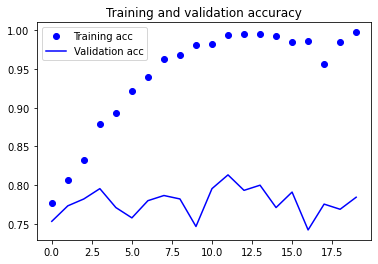

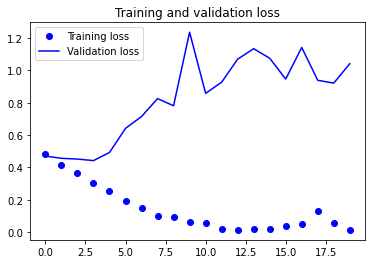

In [ ]:
# plot model accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although the performance is high without using augumentation, validation accuracy is much lower than train accuracy indicating overfitting.
These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 76-77%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.
Because we only have relatively few training samples (1000 each), overfitting is going to be our number one concern. Adding a dropout and weight decay (L2 regularization) could help solve the issue. 

Introducing penalty or regularization could help. Below are the different types of regularizers:
kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
bias_regularizer: Regularizer to apply a penalty on the layer's bias
activity_regularizer: Regularizer to apply a penalty on the layer's output

In [ ]:
from tensorflow.keras import layers, models, regularizers
# building our convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# train the network using data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
# test datagen resizes only
test_datagen = ImageDataGenerator(rescale=1./255)

# use flow_from_directory
# train and validation generators with batch size 50, class mode categorical
# keep resize at 150x150 and add shuffle
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical',
        shuffle=True)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [ ]:
# run fit generator with 10 epochs
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
42/42 [==============================] - 225s 5s/step - loss: 1.3669 - accuracy: 0.4829 - val_loss: 1.0991 - val_accuracy: 0.5733
Epoch 2/20
42/42 [==============================] - 224s 5s/step - loss: 1.0073 - accuracy: 0.5943 - val_loss: 0.9291 - val_accuracy: 0.5756
Epoch 3/20
42/42 [==============================] - 222s 5s/step - loss: 0.8634 - accuracy: 0.6338 - val_loss: 0.8323 - val_accuracy: 0.6422
Epoch 4/20
42/42 [==============================] - 226s 5s/step - loss: 0.7635 - accuracy: 0.6648 - val_loss: 0.7999 - val_accuracy: 0.6133
Epoch 5/20
42/42 [==============================] - 236s 6s/step - loss: 0.7218 - accuracy: 0.6867 - val_loss: 0.6944 - val_accuracy: 0.6778
Epoch 6/20
42/42 [==============================] - 243s 6s/step - loss: 0.6600 - accuracy: 0.7281 - val_loss: 0.7300 - val_accuracy: 0.6667
Epoch 7/20
42/42 [==============================] - 209s 5s/step - loss: 0.6041 - accuracy: 0.7529 - val_loss: 0.6688 - val_accuracy: 0.7000
Epoch 8/20
42

In [ ]:
# save the model
model.save('cats_dogs_panda_no_augument_reg.h5')

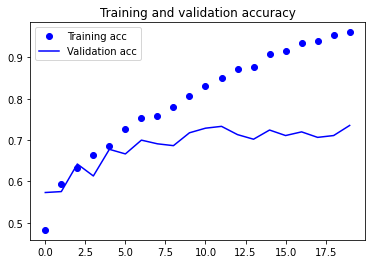

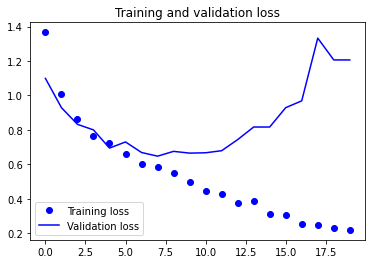

In [ ]:
# plot model accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

It can be observed that performance is not the only metric. Though performances are comparable with and without augumentation, augumentation clearly seems to have generalized the problem and avoided overfitting. Nevethless, in the case scenario it might be good idea to opt for early stopping as the accuracy of training and test diverges at some point

## Transfer Learning with VGG16 
use a state-of-the-art trained NN to solve your image classification problem. Transfer learning uilizes feature learning layers of a trained CNN to classify a different problem than the one it was created for.
In other words, we use the patterns that the NN found to be useful to classify images of a given problem to classify a completely different problem without retraining that part of the network.

![image.png](attachment:image.png)
credits: https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

Let us see how we can use VGG16 for transfer learning.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That's the feature on top of which we will stick a densely-connected classifier.
At this point, there are two ways we could proceed:
Running the convolutional base over our dataset, recording its output to a Numpy array on disk, then using this data as input to a standalone densely-connected classifier similar to those you have seen in the first chapters of this book. This solution is very fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. However, for the exact same reason, this technique would not allow us to leverage data augmentation at all.
Extending the model we have (conv_base) by adding Dense layers on top, and running the whole thing end-to-end on the input data. This allows us to use data augmentation, because every input image is going through the convolutional base every time it is seen by the model. However, for this same reason, this technique is far more expensive than the first one.
We will cover both techniques. Let's walk through the code required to set-up the first one: recording the output of conv_base on our data and using these outputs as inputs to a new model.
We will start by simply running instances of the previously-introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. We will extract features from these images simply by calling the predict method of the conv_base model.

In [ ]:
import os
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = os.getcwd() + '/zoo_classifier(gen)'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    print("features:" + str(features.shape))
    labels = np.zeros(shape=(sample_count,3))
    print("labels:" + str(labels.shape))
    print("extracting images from input directory:" + directory)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    print("processing:")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2100)
validation_features, validation_labels = extract_features(validation_dir, 450)
test_features, test_labels = extract_features(test_dir, 450)

features:(2100, 4, 4, 512)
labels:(2100, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/train
Found 2100 images belonging to 3 classes.
processing:
features:(450, 4, 4, 512)
labels:(450, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/validation
Found 450 images belonging to 3 classes.
processing:
features:(450, 4, 4, 512)
labels:(450, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/test
Found 450 images belonging to 3 classes.
processing:


In [ ]:
print(test_labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
print(test_features)

[[0.18935111 0.         0.         ... 0.         0.76612878 0.        ]
 [0.02593948 0.         2.07591558 ... 0.         0.84068441 0.        ]
 [1.10328209 0.         0.         ... 0.27044263 0.26013321 0.        ]
 ...
 [2.31540442 0.         0.25942558 ... 0.         0.         0.        ]
 [1.04923153 0.         0.46391234 ... 0.         0.00995955 0.        ]
 [0.24141172 0.         0.54678255 ... 0.         0.4893443  0.        ]]


The extracted features are currently of shape (samples, 4, 4, 512). We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 8192):

In [ ]:
train_features = np.reshape(train_features, (2100, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (450, 4 * 4 * 512))
test_features = np.reshape(test_features, (450, 4 * 4 * 512))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2100 samples, validate on 450 samples
Epoch 1/30
2100/2100 [==============================] - 4s 2ms/sample - loss: 1.0070 - acc: 0.5167 - val_loss: 0.7160 - val_acc: 0.7689
Epoch 2/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.6948 - acc: 0.7267 - val_loss: 0.5633 - val_acc: 0.8111
Epoch 3/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.5530 - acc: 0.7967 - val_loss: 0.4807 - val_acc: 0.8178
Epoch 4/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.4691 - acc: 0.8329 - val_loss: 0.4358 - val_acc: 0.8222
Epoch 5/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.4189 - acc: 0.8481 - val_loss: 0.3977 - val_acc: 0.8578
Epoch 6/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.3730 - acc: 0.8633 - val_loss: 0.3755 - val_acc: 0.8578
Epoch 7/30
2100/2100 [==============================] - 3s 2ms/sample - loss: 0.3319 - acc: 0.8800 - val_loss: 0.3557 - val_acc: 0.8689
E

Training is very fast, since we only have to deal with two Dense layers -- an epoch takes less than one second even on CPU.Let's take a look at the loss and accuracy curves during training:

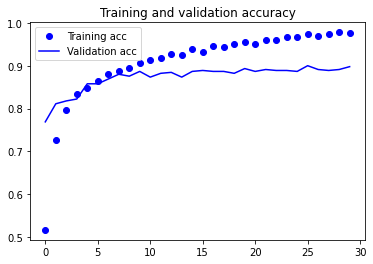

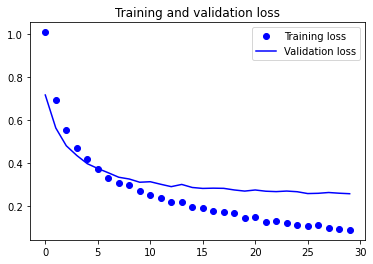

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

By far,transfer learning has yielded better accuracy.

with augumentation:
Epoch 20/20
42/42 [==============================] - 266s 6s/step - loss: 0.5230 - accuracy: 0.7567 - val_loss: 0.4809 - val_accuracy: 0.7689

without augumentation:
42/42 [==============================] - 234s 6s/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 1.3255 - val_accuracy: 0.7644

without augumentation and regularization:
Epoch 20/20
42/42 [==============================] - 173s 4s/step - loss: 0.2193 - accuracy: 0.9610 - val_loss: 1.2060 - val_accuracy: 0.7356

transfer learning:
Epoch 30/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.0907 - acc: 0.9752 - val_loss: 0.2585 - val_acc: 0.8978

In [ ]:
# save the model
model.save('transfer_learning.h5')

## Image Augumentation

In [ ]:
import os
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = os.getcwd() + '/zoo_classifier(gen)'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

batch_size = 50

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    print("features:" + str(features.shape))
    labels = np.zeros(shape=(sample_count,3))
    print("labels:" + str(labels.shape))
    print("extracting images from input directory:" + directory)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    print("processing:")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2100)
validation_features, validation_labels = extract_features(validation_dir, 450)
test_features, test_labels = extract_features(test_dir, 450)

features:(2100, 4, 4, 512)
labels:(2100, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/train
Found 2100 images belonging to 3 classes.
processing:
features:(450, 4, 4, 512)
labels:(450, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/validation
Found 450 images belonging to 3 classes.
processing:
features:(450, 4, 4, 512)
labels:(450, 3)
extracting images from input directory:/Users/surekha/Downloads/DAAN 570/submissions/zoo_classifier(gen)/test
Found 450 images belonging to 3 classes.
processing:


## reshape - flatten the images

In [ ]:
train_features = np.reshape(train_features, (2100, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (450, 4 * 4 * 512))
test_features = np.reshape(test_features, (450, 4 * 4 * 512))

# Define model - multi class classification

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2100 samples, validate on 450 samples
Epoch 1/30
2100/2100 [==============================] - 4s 2ms/sample - loss: 1.1206 - acc: 0.4424 - val_loss: 0.8543 - val_acc: 0.6578
Epoch 2/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.8773 - acc: 0.5971 - val_loss: 0.7545 - val_acc: 0.6867
Epoch 3/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.7569 - acc: 0.6748 - val_loss: 0.6621 - val_acc: 0.7644
Epoch 4/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.6709 - acc: 0.7224 - val_loss: 0.6072 - val_acc: 0.7733
Epoch 5/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.6052 - acc: 0.7681 - val_loss: 0.5701 - val_acc: 0.7800
Epoch 6/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.5562 - acc: 0.7814 - val_loss: 0.5478 - val_acc: 0.7778
Epoch 7/30
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.5214 - acc: 0.7986 - val_loss: 0.5256 - val_acc: 0.7800
E

# Plot the metrics

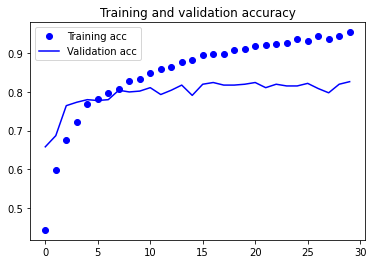

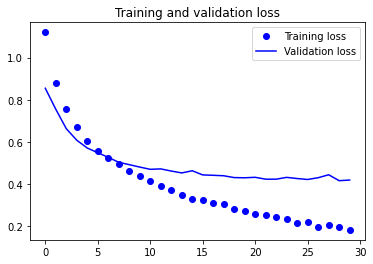

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Augumentation did not seem to have improved the performance to considerable extent. 

# Save the model

In [ ]:
# save the model
model.save('transfer_learning(augumented).h5')